In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv("Probablity_of_default.csv")
df.head()

,Credit_Score,Income,Debt_to_Income_Ratio,Employment_Length,Credit_History_Length,Number_of_Credit_Inquiries,Default
0,720,50000,0.35,5,10,2,0
1,650,35000,0.55,2,5,4,1
2,780,80000,0.20,10,15,1,0
3,580,25000,0.80,1,3,6,1
4,700,60000,0.40,7,12,3,0


In [6]:
# Define the independent and dependent variables 
y= df['Default'] 
#dependent variable is Decision 
x= df.drop(['Default'], axis=1) 
# splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(x_test)


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [20]:
cm


array([[55,  0],
       [ 0, 59]], dtype=int64)

In [22]:
ac

1.0

[[55  0]
 [ 0 59]]


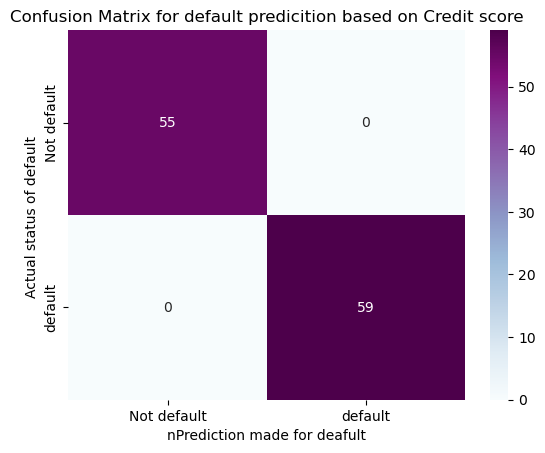

In [24]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for default predicition based on Credit score');
ax.set_xlabel('nPrediction made for deafult')
ax.set_ylabel('Actual status of default ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not default','default'])
ax.yaxis.set_ticklabels(['Not default','default'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
FP= 0
FN= 0
Total=len(y_test)
print("Accuracy ", (TN+TP)/Total)

Accuracy  1.0


In [28]:
print("Precision ", (TP)/(TP+FP))

Precision  1.0


In [30]:
print("Recall ", (TP)/(TP+FN))

Recall  1.0


In [32]:
print("Specificity ", (TN)/(TN+FP))

Specificity  1.0
